# Import библиотек

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import PredictionErrorDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Набор данных

In [51]:
df = pd.read_csv('/content/drive/MyDrive/ML-projects/House_Rent_Dataset.csv', delimiter=',')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


## Анализ признаков

In [52]:
#Posted On - когда было объявление
df = df.drop(columns = 'Posted On', axis = 1)
#BHK - количество спален, холла, кухни.
#Rent - арендная плата
#Size - квадратная площадь
#Floor - на каком этаже из количества всех этажей
#Area Type - тип района
#Area Locality - местоположение района
#City - город расположения
#Furnishing Status - статус по заполнености квартиры мебелью
#Tenant Preferred - предпочитаемый вид арендатора от продавца
#Bathroom - количество ванных комнат
#Point of Contact - контактное лицо

###Разберемся с типами данных

In [55]:
#Все значения в столбцах нужного нам типа
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 408.0+ KB


###Проверим df на наличие дубликатов и пропусков

In [56]:
#Проверим наличие дубликатов
df.duplicated().sum()

8

In [58]:
df = df.drop_duplicates()

In [61]:
#Проверим наличие пропусков
df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

###Рассмотрим категориальные и числовые столбцы

In [62]:
cat_columns = []
num_columns = []

for i in df.columns:
    if (df[i].dtypes == object):
        cat_columns +=[i]
    else:
        num_columns +=[i]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'] 
 Число столблцов =  7
Числовые данные:	  ['BHK', 'Rent', 'Size', 'Bathroom'] 
 Число столблцов =  4


## Рассмотрим основную статистику нашего df

In [63]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4738.000000,4.738000e+03,4738.000000,4738.000000
mean,2.083369,3.494960e+04,967.433727,1.965386
std,0.831366,7.812764e+04,633.870121,0.883590
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Исходя из зрительного анализа уже можно заметить странные данные в столбцах:
1. слишком маленькая площадь дома
2. слишком большое количество ванных комнат

###Корреляция числовых признаков

In [64]:
cm = sns.color_palette("coolwarm", as_cmap=True)
df[num_columns].corr().style.background_gradient(cmap=cm,
                                    vmin = -1,
                                    vmax=1)

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369081,0.715636,0.794219
Rent,0.369081,1.000000,0.413535,0.440704
Size,0.715636,0.413535,1.000000,0.740215
Bathroom,0.794219,0.440704,0.740215,1.000000


Признаки имеют высокую корреляцию, но если подумать, то по сути в этом есть смысл, так как количество комнат/ванн зависит от размера дома

# Гистограммы распределений

In [65]:
def plot_hist_plotly(df, col_names, rows = 2, cols = 2 ):
    fig = make_subplots(rows=rows, cols=cols,
                        subplot_titles= (col_names))
    for idx, column_name in enumerate(col_names):
        fig.add_trace(
            go.Histogram(x=df[column_name],
                nbinsx = 10),
        row=idx//2+1, col=idx%2+1)
    fig.update_layout(height=1000, width=1000)
    fig.show()

In [66]:
plot_hist_plotly(df, num_columns)

Рассмотрим данные по плате за аренду и площадь покрупнее

In [68]:
# Плата за аренду
fig = px.scatter(df,
                 x='Rent',
                 log_x=True
                 )
fig.show()

In [69]:
# Площадь
fig = px.scatter(df,
                 x='Size',
                 log_x=True
                 )
fig.show()

In [70]:
#Количество комнат больше 5 это уже редкий случай
question_bhk = df[(df['BHK'] > 5)]
df = df.drop(question_bhk.index)

# Арендная плата меньше 5000 встречается мало, а также больше 200 000
question_rent = df[(df['Rent'] < 5000) | (df['Rent'] > 200000)]
df = df.drop(question_rent.index)

# Размер площади меньше 50 встречается мало, а также больше 5000
question_size = df[(df['Size'] < 50) | (df['Size'] > 5000)]
df = df.drop(question_size.index)

#Количество ванных комнат больше 4 это уже редкий случай
question_bath = df[(df['Bathroom'] > 4)]
df = df.drop(question_bath.index)

df = df.reset_index(drop=True)

# Обучение

## Подготовка данных

In [21]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.7 MB/s eta 0:00:00


In [71]:
#Удаляем целевую переменную из признаков (цена на дом)
X, y = df.drop(columns = ['Rent']), df['Rent']
features_names = list(df.drop(columns = ["Rent"]).columns)

#Разбиваем на тестовую и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [72]:
from catboost import Pool

In [73]:
train_data_reg = Pool(
    data=X_train,
    label=y_train,
    cat_features = cat_columns,
    feature_names=features_names,
)

eval_data_reg = Pool(
    data=X_val,
    label=y_val,
    cat_features = cat_columns,
    feature_names=features_names
)

## Составление модели

In [83]:
from catboost import CatBoostRegressor

In [85]:
model_reg = CatBoostRegressor(iterations = 1000,
                            early_stopping_rounds=100,
                            verbose = 100,
                            cat_features = cat_columns,
                            depth = 3,
                            objective  = 'MAE',
                            eval_metric= 'MAE',
                            random_state = 42
                           )

In [86]:
model_reg.fit(X=train_data_reg,
          eval_set=eval_data_reg,
          )

0:	learn: 16944.4708177	test: 16292.3432018	best: 16292.3432018 (0)	total: 4.78ms	remaining: 4.78s
100:	learn: 8942.4942336	test: 8988.7254191	best: 8988.7254191 (100)	total: 347ms	remaining: 3.09s
200:	learn: 8096.5141718	test: 8284.0329687	best: 8284.0329687 (200)	total: 697ms	remaining: 2.77s
300:	learn: 7794.4697425	test: 8017.5357658	best: 8017.5357658 (300)	total: 1.01s	remaining: 2.35s
400:	learn: 7597.9711476	test: 7889.2917863	best: 7889.2917863 (400)	total: 1.38s	remaining: 2.06s
500:	learn: 7497.9198658	test: 7841.0362822	best: 7840.3673124 (497)	total: 1.74s	remaining: 1.73s
600:	learn: 7419.8511001	test: 7804.8100695	best: 7804.7638076 (597)	total: 2.13s	remaining: 1.41s
700:	learn: 7339.3471331	test: 7768.2380886	best: 7768.2380886 (700)	total: 2.5s	remaining: 1.07s
800:	learn: 7296.8555108	test: 7747.5750625	best: 7747.5750625 (800)	total: 2.84s	remaining: 706ms
900:	learn: 7244.2791871	test: 7731.8924289	best: 7731.8924289 (900)	total: 3.2s	remaining: 352ms
999:	learn: 

## Важность признаков

In [90]:
def feature_importance_plotter(model, features_names):
    feature_importance = model.feature_importances_

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

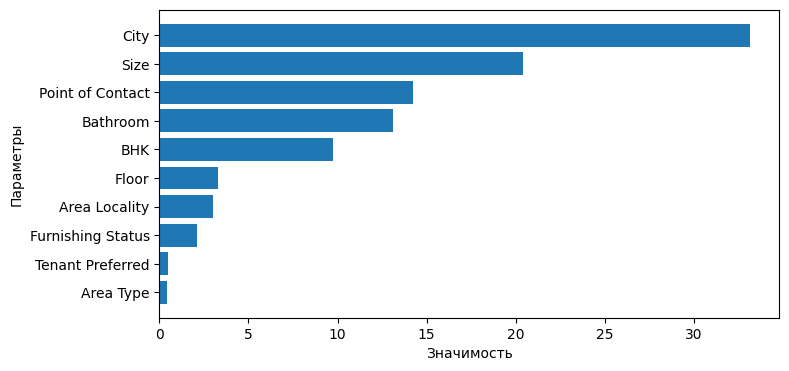

In [91]:
#Отрисовываем значимость признаков
feature_importance_plotter(model_reg, np.array(features_names))

Вывод по значимости:
* самые важные признаки - город, площадь и контактное лицо (впринципе понятно, ведь цена на жилую площадь зависит от популряности города и площади квартиры, но признак по контактному лицу немного странный, возможно от цены зависит, с кем надо связываться)
* самые незначимые признаки - заполненость мебелью, вид арендатора и тип района (цена не сильно запвисит от типа арендадотра и района, но вот заполненость мебелью по идее должна иметь вес, однако можно предположить, что речь идет не о супер капитальном ремонте)

## Метрики модели

In [77]:
def calculate_metric(model_pipe, X, y, metric = r2_score):
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [87]:
print(f"r2 на тренировочной выборке: {calculate_metric(model_reg, train_data_reg, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model_reg, eval_data_reg, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model_reg, train_data_reg, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model_reg, eval_data_reg, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.7898
r2 на валидационной выборке: 0.7142
mse на тренировочной выборке: 194585031.8316
mse на валидационной выборке: 272677164.1914


Метрики довольно неплохие

## Кросс-валидация

In [40]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [41]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [42]:
cross_validation (X_train, y_train,
                  model_reg,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Выходные данные были обрезаны до нескольких последних строк (5000).
1:	learn: 16706.1699865	total: 8.65ms	remaining: 4.32s
2:	learn: 16396.4218026	total: 11.6ms	remaining: 3.86s
3:	learn: 16151.4990547	total: 15.2ms	remaining: 3.77s
4:	learn: 15916.0307417	total: 17.4ms	remaining: 3.47s
5:	learn: 15640.6192142	total: 20.1ms	remaining: 3.33s
6:	learn: 15428.3034199	total: 22.3ms	remaining: 3.17s
7:	learn: 15188.7306571	total: 25.7ms	remaining: 3.19s
8:	learn: 14954.1860675	total: 28.2ms	remaining: 3.11s
9:	learn: 14713.3965375	total: 30.7ms	remaining: 3.04s
10:	learn: 14497.0120508	total: 33.6ms	remaining: 3.02s
11:	learn: 14347.8613606	total: 37.1ms	remaining: 3.06s
12:	learn: 14161.7362527	total: 40.4ms	remaining: 3.06s
13:	learn: 13979.1837971	total: 43.8ms	remaining: 3.08s
14:	learn: 13832.7035817	total: 46.6ms	remaining: 3.06s
15:	learn: 13611.5110971	total: 49.9ms	remaining: 3.07s
16:	learn: 13431.3316309	total: 52.6ms	remaining: 3.04s
17:	learn: 13325.1217487	total: 55.3ms	remain

,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,4.623358,0.009900,0.730323,-2.571105e+08,-8159.135656,-123035.631060
1,4.898551,0.006838,0.737908,-3.083533e+08,-8558.996903,-125933.741325
2,3.891426,0.009254,0.796611,-1.535623e+08,-7519.013750,-61148.368755
3,4.066742,0.008841,0.828749,-1.491882e+08,-6852.068330,-76934.343043
4,5.327344,0.005878,0.719269,-2.421755e+08,-7682.668752,-126758.323193




test_R2      7.625720e-01
test_-MSE   -2.220780e+08
test_-MAE   -7.754377e+03
test_-Max   -1.027621e+05
dtype: float64


На кросс валидации незаметно сильное расхождение метрик, соответственно переобучение не видно

## Визуализация ошибок

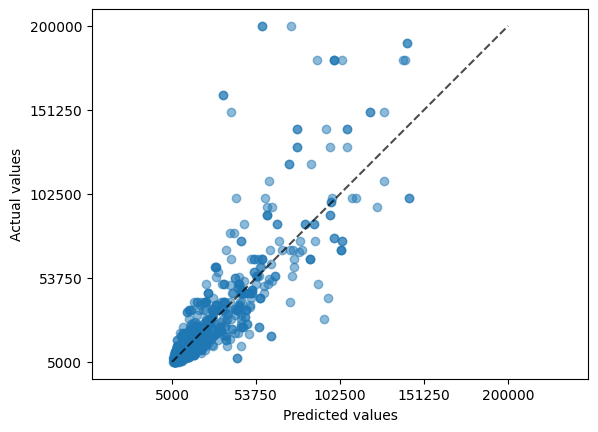

In [79]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model_reg.predict(eval_data_reg),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы:
* цены на низкую арендную плату впринципе модель угадывает
* есть большие проблемы с с предсказанием дорогой арендной платы

# Оптимизация гиперпараметров

In [80]:
from scipy import stats

model = CatBoostRegressor(
    random_seed=42,
    thread_count=-1,
    cat_features=cat_columns,
    eval_metric="RMSE",
    verbose=500,
)

param_distribution = {
    "one_hot_max_size": stats.bernoulli(p=0.2, loc=2),
    "learning_rate": [0.03, 0.1, 0.3],
    "l2_leaf_reg": [2, 5, 7],
    "depth": stats.binom(n=10, p=0.2),
}
randomized_search_result = model.randomized_search(param_distribution, X_train, y_train)
model.best_score_

0:	learn: 39369.4858551	test: 43914.9370061	best: 43914.9370061 (0)	total: 1.33ms	remaining: 1.32s
500:	learn: 16929.2249403	test: 18777.5598655	best: 18777.5598655 (500)	total: 347ms	remaining: 346ms
999:	learn: 16684.3851198	test: 18563.1227749	best: 18562.5865633 (996)	total: 1.14s	remaining: 0us

bestTest = 18562.58656
bestIteration = 996

0:	loss: 18562.5865633	best: 18562.5865633 (0)	total: 1.18s	remaining: 10.6s
0:	learn: 39369.4858551	test: 43914.9370061	best: 43914.9370061 (0)	total: 5.22ms	remaining: 5.22s
500:	learn: 16929.2249403	test: 18777.5598655	best: 18777.5598655 (500)	total: 740ms	remaining: 737ms
999:	learn: 16684.3851198	test: 18563.1227749	best: 18562.5865633 (996)	total: 1.64s	remaining: 0us

bestTest = 18562.58656
bestIteration = 996

1:	loss: 18562.5865633	best: 18562.5865633 (0)	total: 2.84s	remaining: 11.4s
0:	learn: 39369.4858551	test: 43914.9370061	best: 43914.9370061 (0)	total: 2.52ms	remaining: 2.52s
500:	learn: 16929.2249403	test: 18777.5598655	best: 187

{'learn': {'RMSE': 11109.997555123344}}

In [81]:
# Лучшие параметры модели из перебора
randomized_search_result["params"]

{'depth': 4, 'one_hot_max_size': 2, 'learning_rate': 0.1, 'l2_leaf_reg': 5}

## Важность признаков

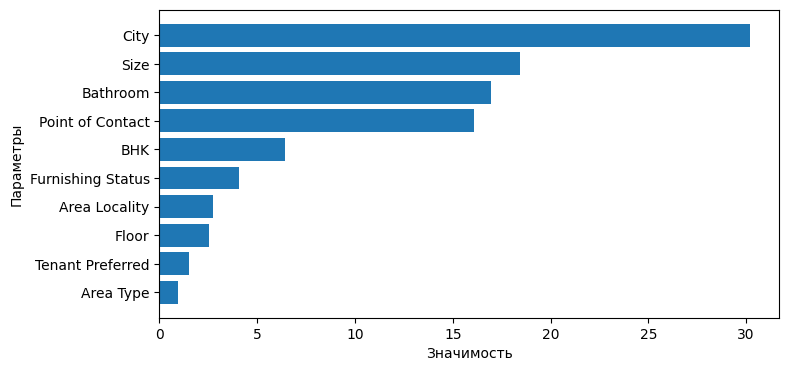

In [93]:
#Отрисовываем значимость признаков
feature_importance_plotter(model, np.array(features_names))

Вывод по значимости:
* самые важные признаки - город, площадь и количество ванных комнат (впринципе понятно, ведь цена на жилую площадь зависит от популярности города, площади квартиры и количестве ванных комнат)
* самые незначимые признаки - этаж, вид арендатора и тип района (цена не сильно запвисит от типа арендадотра и района, с этажом не очень понятно ведь бывают низкие цены на первый и последний этаж, хотя не исключено, что таких этажей не было в выборке)

## Метрики модели

In [82]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, train_data_reg, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, eval_data_reg, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, train_data_reg, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, eval_data_reg, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.8372
r2 на валидационной выборке: 0.7200
mse на тренировочной выборке: 150676867.5959
mse на валидационной выборке: 267142474.0864


Метрики стали лучше, однако на валидационном метрика выросла не сильно (возможно переобучили модель)

## Кросс-валидация

In [94]:
cross_validation (X_train, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

0:	learn: 28374.1191728	total: 4.58ms	remaining: 4.58s
500:	learn: 11910.7028440	total: 1.8s	remaining: 1.8s
999:	learn: 10793.1908935	total: 3.66s	remaining: 0us
0:	learn: 28315.5225042	total: 4.26ms	remaining: 4.26s
500:	learn: 11913.4352680	total: 2.65s	remaining: 2.64s
999:	learn: 10571.7567537	total: 5.62s	remaining: 0us
0:	learn: 28213.7560052	total: 4.27ms	remaining: 4.26s
500:	learn: 11777.3404601	total: 1.8s	remaining: 1.79s
999:	learn: 10426.2877577	total: 3.61s	remaining: 0us
0:	learn: 28949.0065253	total: 4.26ms	remaining: 4.25s
500:	learn: 12072.1391952	total: 1.79s	remaining: 1.78s
999:	learn: 10775.8266463	total: 3.65s	remaining: 0us
0:	learn: 28269.9933480	total: 4.78ms	remaining: 4.77s
500:	learn: 11545.5545675	total: 2.65s	remaining: 2.65s
999:	learn: 10378.7795404	total: 5.7s	remaining: 0us
Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,3.822903,0.005679,0.782758,-2.246190e+08,-8051.213914,-118209.017678
1,5.802478,0.008720,0.757400,-2.618492e+08,-8591.483543,-113331.137831
2,3.773370,0.006739,0.780760,-2.417694e+08,-8616.354379,-77069.286099
3,3.812840,0.005923,0.816296,-1.220217e+08,-6591.031059,-66330.125478
4,5.876960,0.006567,0.753364,-2.670217e+08,-8354.204564,-113719.321566




test_R2      7.781154e-01
test_-MSE   -2.234562e+08
test_-MAE   -8.040857e+03
test_-Max   -9.773178e+04
dtype: float64


На кросс-валидации незаметно сильное расхождение метрик, соотвественно не переобучили

## Визуализация ошибок

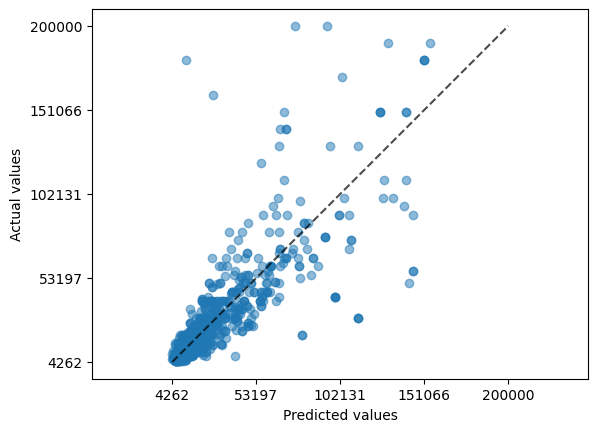

In [95]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(eval_data_reg),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Все та же проблема с предсказанием высоких арендных плат, но уже меньше выбросов